# Employee Retention

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:


* Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id


* What are the main factors that drive employee churn? Do they make sense? Explain your findings


* If you could add to this data set just one variable that could help explain employee churn, what would that be?



In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('employee_retention.csv')

In [4]:
df.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaN
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaN
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23
9,504159.0,1,sales,7,104000.0,2012-06-12,NaN


- employee_id : id of the employee. Unique by employee per company

- company_id : company id. It is unique by company

- dept : employee dept

- seniority : number of yrs of work experience when hired

- salary: avg yearly salary of the employee during her tenure within the company

- join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13

- quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)

In [6]:
df.join_date = pd.to_datetime(df.join_date)
df.quit_date = pd.to_datetime(df.quit_date)

In [95]:
df['duration'] = (df.quit_date - df.join_date).astype('timedelta64[D]')

In [11]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [12]:
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [41]:
unique_dates = pd.date_range(start='2011/01/24', end='2015/12/13')
unique_dates

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
               '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31',
               '2011-02-01', '2011-02-02',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1785, freq='D')

In [42]:
unique_company = sorted(df.company_id.unique())
unique_company

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [57]:
day = []
company = []
headcount = []

for date in unique_dates:
    for i in unique_company:
        #print(date,i)
        temp_join = df[(df.join_date<=date) & (df.company_id == i)]
        temp_left = df[(df.quit_date<=date) & (df.company_id == i)]
        
        day.append(date)
        company.append(i)
        headcount.append(len(temp_join)-len(temp_left))

In [58]:
df_headcount = pd.DataFrame({
        'date': day,
        'company_id':company,
        'employee_headcount': headcount
    })

In [60]:
df_headcount.head(10)

,date,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
5,2011-01-24,6,3
6,2011-01-24,7,1
7,2011-01-24,8,6
8,2011-01-24,9,3
9,2011-01-24,10,0


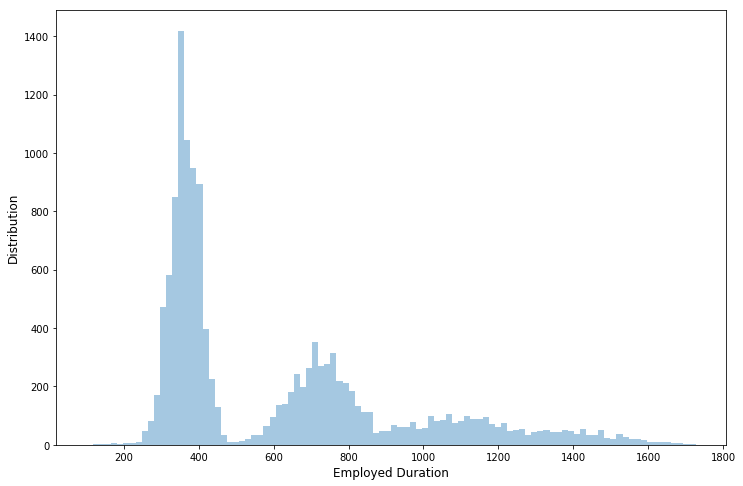

In [80]:
#plt.hist(df.duration.dropna(), bins=100)
#plt.show()


fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(df.duration.dropna(), bins=100, kde=False, ax=ax)
ax.set_xlabel('Employed Duration', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)
plt.show()

In [83]:
df['quit_month'] = df.quit_date.dt.month
df['quit_week'] = df.quit_date.dt.week

Text(0, 0.5, 'Distribution')

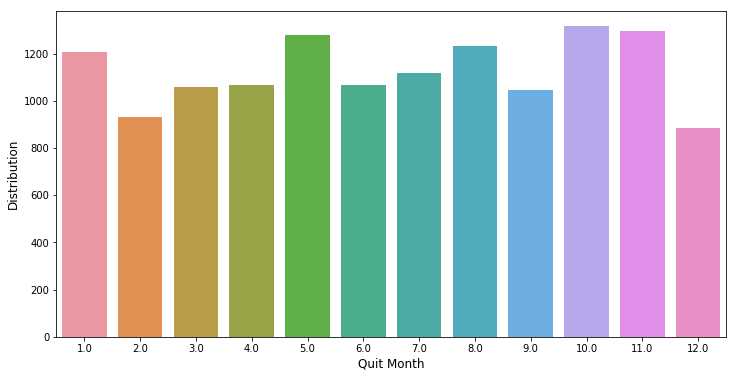

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(df.quit_month,ax = ax)
ax.set_xlabel('Quit Month', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)

Text(0, 0.5, 'Distribution')

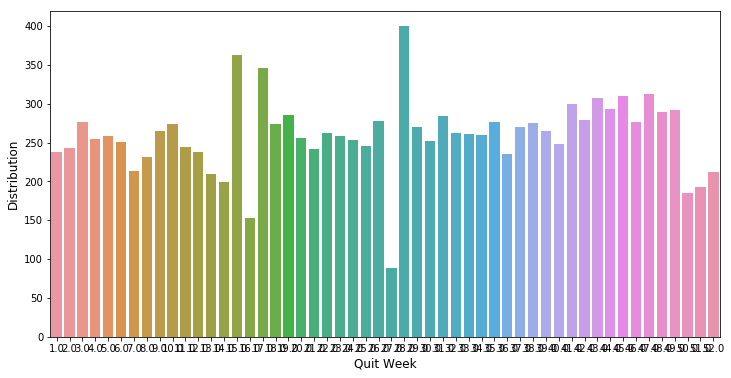

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(df.quit_week,ax = ax)
ax.set_xlabel('Quit Week', fontsize=12)
ax.set_ylabel('Distribution', fontsize=12)

In [96]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,qui_month,quit_month,quit_week,duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,10.0,10.0,44.0,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,4.0,4.0,14.0,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,NaN,NaN,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,6.0,6.0,23.0,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,8.0,8.0,34.0,1040.0


In [101]:
df['quit_class'] = 0
df['quit_class'][df.duration <= 365] =1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,qui_month,quit_month,quit_week,duration,quit_class
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,10.0,10.0,44.0,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,4.0,4.0,14.0,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,NaN,NaN,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,6.0,6.0,23.0,389.0,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,8.0,8.0,34.0,1040.0,0


In [111]:
df_dummy = pd.get_dummies(df[['company_id', 'dept', 'seniority', 'salary', 'quit_class']], drop_first=True)  

In [113]:
df_dummy.head()

,company_id,seniority,salary,quit_class,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,7,28,89000.0,0,0,0,0,0,0
1,7,20,183000.0,1,0,0,0,1,0
2,4,14,101000.0,0,0,0,0,1,0
3,7,20,115000.0,0,0,0,0,0,0
4,2,23,276000.0,0,1,0,0,0,0


In [114]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [115]:
X = df_dummy.drop(['quit_class'],axis=1)
y = df_dummy.quit_class

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [117]:
y_train.value_counts()

0    16758
1     3003
Name: quit_class, dtype: int64

In [141]:
DT = DecisionTreeClassifier(class_weight="balanced",max_depth=4, min_samples_leaf=30, random_state=20)
#DT = DecisionTreeClassifier(class_weight="balanced")
#DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [142]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred =DT.predict(X_test)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.257450538442274
0.15613608748481167
0.7332382310984308


In [158]:
importances = DT.feature_importances_

important_list = []
for i in np.argsort(importances)[::-1]:
    important_list.append(list(X_train.columns)[i])
    
print(np.array(important_list))
print(np.sort(importances)[::-1])

['salary' 'company_id' 'dept_design' 'seniority' 'dept_sales'
 'dept_marketing' 'dept_engineer' 'dept_data_science']
[0.81960456 0.06756582 0.04218615 0.03754813 0.03309534 0.
 0.         0.        ]


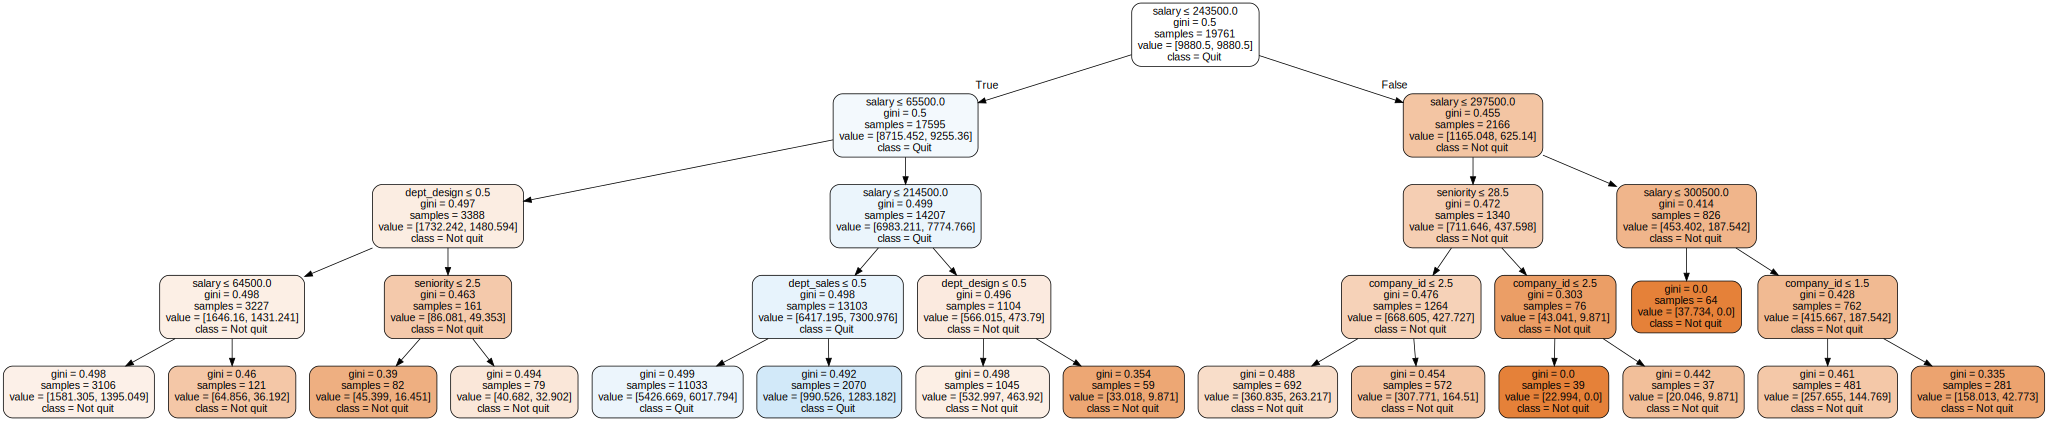

In [148]:
import graphviz
from sklearn import tree


features = list(X_train.columns)
targets = ['Not quit', 'Quit']
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=features, class_names=targets, 
                                filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

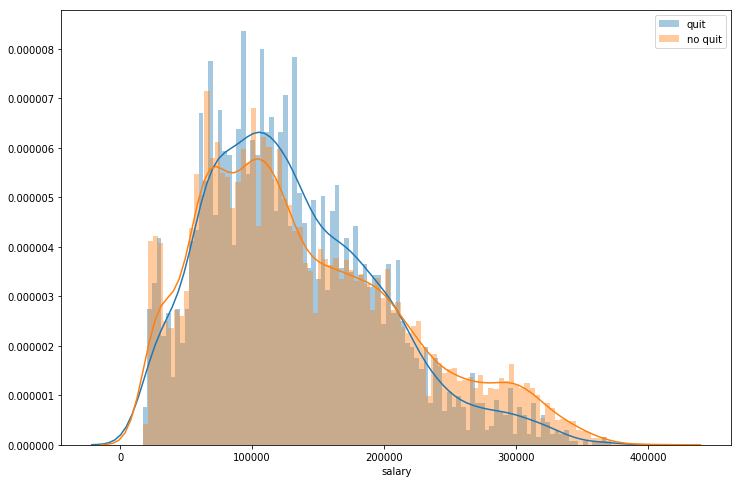

In [166]:
salary_quit = df[df.quit_class == 1].salary
salary_stay = df[df.quit_class == 0].salary

fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(salary_quit, bins=100, label='quit',ax=ax)
sns.distplot(salary_stay, bins=100, label='no quit',ax=ax)
ax.legend()
plt.show()

In [175]:
bins = pd.cut(df.salary,10)

In [181]:
df_salary = df.groupby(bins)['quit_class'].mean().reset_index()
ax.tick_params(labelrotation=90)
df_salary

,salary,quit_class
0,"(16609.0, 56100.0]",0.131324
1,"(56100.0, 95200.0]",0.157685
2,"(95200.0, 134300.0]",0.167780
3,"(134300.0, 173400.0]",0.172108
4,"(173400.0, 212500.0]",0.159135
5,"(212500.0, 251600.0]",0.130313
6,"(251600.0, 290700.0]",0.093831
7,"(290700.0, 329800.0]",0.079958
8,"(329800.0, 368900.0]",0.062937
9,"(368900.0, 408000.0]",0.058824


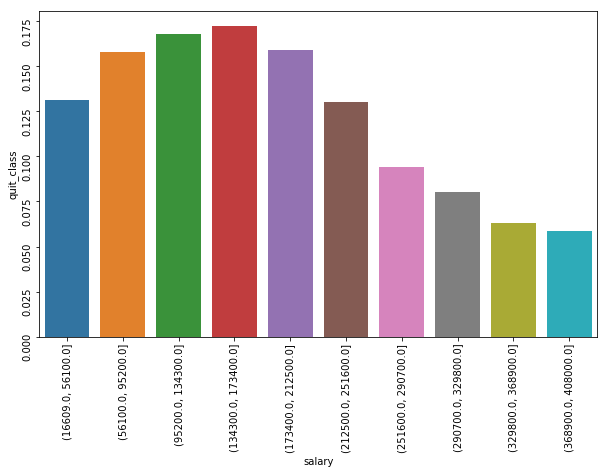

In [183]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='salary', y='quit_class', data=df_salary, ax=ax)
ax.tick_params(labelrotation=90)